<a href="https://colab.research.google.com/github/Jivang0/machine_learning_all/blob/main/Gradient_Boosting_Regression6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5 # random number 0 - 1
y = 3*X[:,0]**2 + 0.05 * np.random.randn(100) # y = 3x^2 + noise

In [3]:
df = pd.DataFrame()
df['X'] = X.reshape(100)
df['y'] = y

In [4]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs Y')

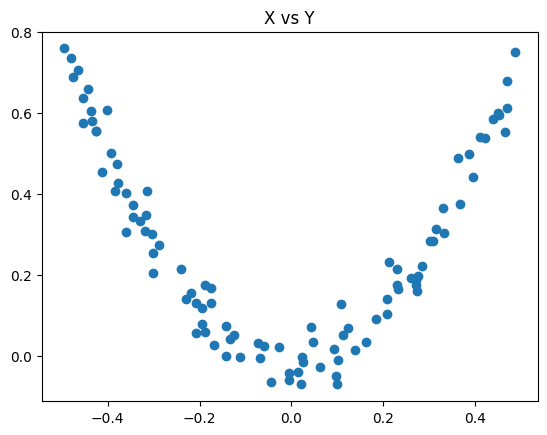

In [5]:
plt.scatter(df['X'],df['y']) # non linear relationship cha
plt.title('X vs Y')

In [6]:
df['pred1'] = df['y'].mean()

In [7]:
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [8]:
df['res1'] = df['y'] - df['pred1']

In [9]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


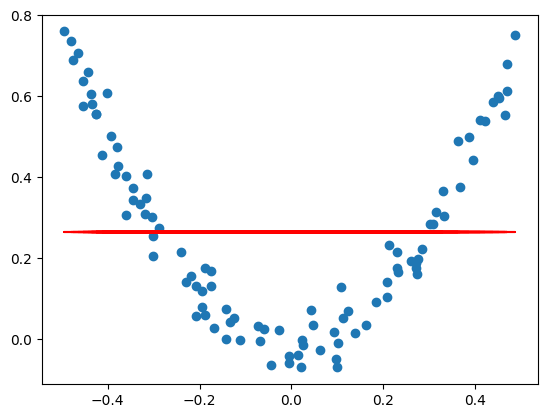

In [11]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red') # red line is m1 model

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
# GB ma 8 to 32 range ma nice result

In [14]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)
# this is model 2, X input and  res1 output

DecisionTreeRegressor(max_leaf_nodes=8)

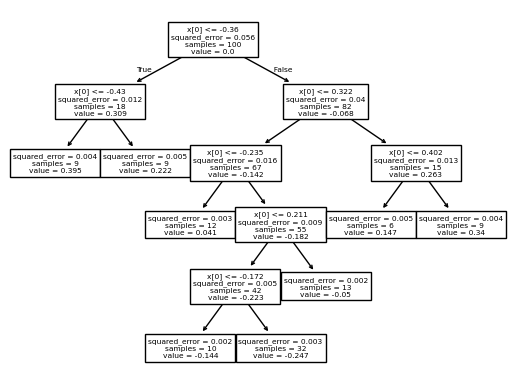

In [15]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [16]:
# generating X_test
X_test = np.linspace(-0.5,0.5,500)


In [19]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))
# y_pred = m1 + m2

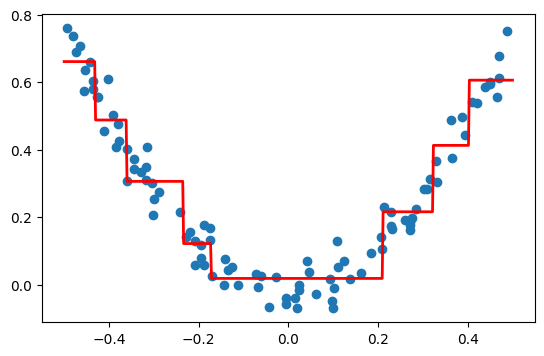

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [21]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [22]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [23]:
df['res2'] = df['y'] - df['pred2']
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [25]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [26]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [27]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])


Text(0.5, 1.0, 'X vs y')

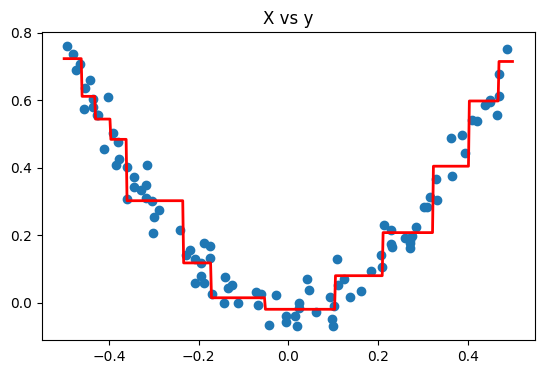

In [28]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

def gradient_boost(X, y, number, lr=0.1, count=1, regs=None, y0=None):
    if regs is None:
        regs = []
        y0 = np.full_like(y, y.mean(), dtype=float)  # initial prediction

    if number == 0:
        return regs, y0

    # current prediction
    y_pred = y0 + sum(lr * reg.predict(X) for reg in regs)

    # residuals (negative gradient of MSE)
    residuals = y - y_pred

    tree = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree.fit(X, residuals)
    regs.append(tree)

    # plotting
    x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
    y_plot = y0[0] + sum(lr * reg.predict(x1) for reg in regs)

    plt.figure()
    plt.plot(x1, y_plot, linewidth=2)
    plt.plot(X[:, 0], y, "r.")
    plt.title(f"Iteration {count}")
    plt.show()

    return gradient_boost(X, y, number-1, lr, count+1, regs, y0)



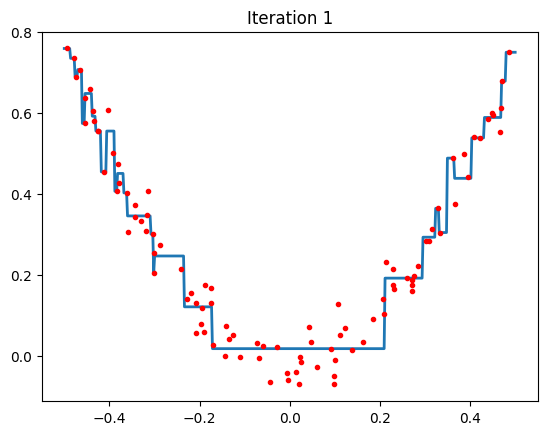

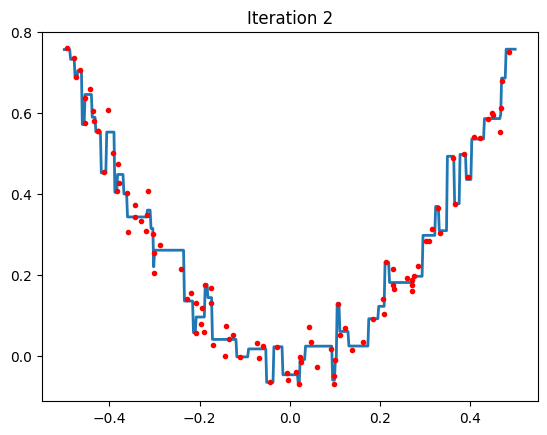

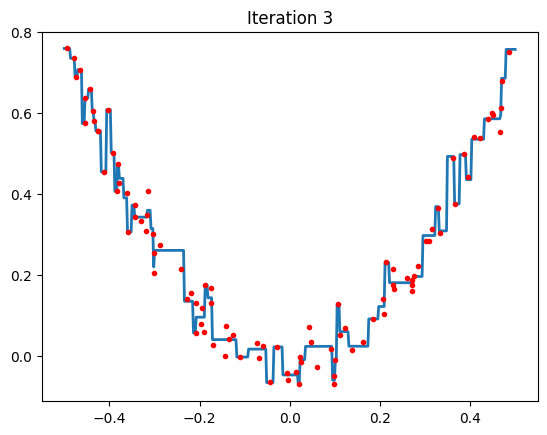

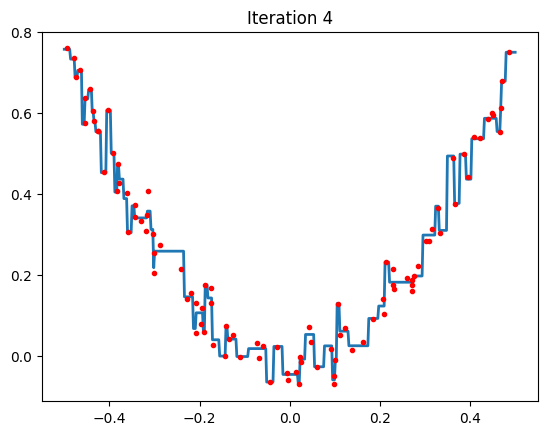

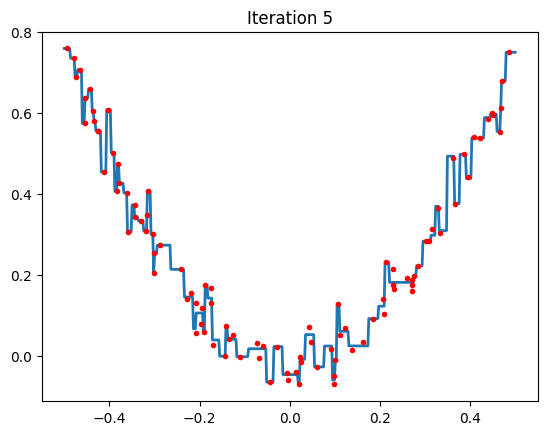

([DecisionTreeRegressor(max_depth=5, random_state=42),
  DecisionTreeRegressor(max_depth=5, random_state=42),
  DecisionTreeRegressor(max_depth=5, random_state=42),
  DecisionTreeRegressor(max_depth=5, random_state=42),
  DecisionTreeRegressor(max_depth=5, random_state=42)],
 array([0.2654584, 0.2654584, 0.2654584, 0.2654584, 0.2654584, 0.2654584,
        0.2654584, 0.2654584, 0.2654584, 0.2654584, 0.2654584, 0.2654584,
        0.2654584, 0.2654584, 0.2654584, 0.2654584, 0.2654584, 0.2654584,
        0.2654584, 0.2654584, 0.2654584, 0.2654584, 0.2654584, 0.2654584,
        0.2654584, 0.2654584, 0.2654584, 0.2654584, 0.2654584, 0.2654584,
        0.2654584, 0.2654584, 0.2654584, 0.2654584, 0.2654584, 0.2654584,
        0.2654584, 0.2654584, 0.2654584, 0.2654584, 0.2654584, 0.2654584,
        0.2654584, 0.2654584, 0.2654584, 0.2654584, 0.2654584, 0.2654584,
        0.2654584, 0.2654584, 0.2654584, 0.2654584, 0.2654584, 0.2654584,
        0.2654584, 0.2654584, 0.2654584, 0.2654584, 0.2654

In [35]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)